---
# FINAL PROJECT

=================================================

Batch : HCK-020

Kelompok : Abimanyu Maheswara, Khalil Zufar, Sulthan Fachry, Ciputra Wangsa

=================================================

Objective:

Pada project kali ini objektifnya adalah untuk melakukan clustering pada dataset e-commerce. Guna dalam mencari tahu customer mana yang sering melakukan purchase agar dapat menyusun strategi marketing dalam mempertahankan dan menambah loyalitas customer.

---

## Import Libraries

In [1]:
# Dataframe
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from feature_engine.outliers import Winsorizer

# Model Cluster
from sklearn.cluster import KMeans

# Model Saving
import pickle

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")

---
## Data Loading

In [2]:
# Read CSV file
data = pd.read_csv('retail_clustering.csv',encoding='ISO-8859-1')

In [3]:
# Show top 10 from data
data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend
0,12346,325,1,74215,77183.60
1,12347,39,5,223,494.65
2,12348,318,2,264,92.16
3,12349,18,1,46,101.69
4,12350,310,1,37,100.00
5,12352,36,6,27,732.30
6,12354,232,1,8,49.70
7,12356,245,2,52,308.40
8,12357,33,1,260,708.46
9,12358,150,1,20,115.58


In [4]:
# Show 10 data from tail
data.tail(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend
3748,18269,366,1,24,20.40
3749,18272,2,5,140,248.54
3750,18273,2,1,20,51.00
3751,18274,17,2,4,42.48
3752,18276,43,1,42,35.88
3753,18278,73,1,16,25.20
3754,18280,277,1,14,58.50
3755,18281,180,1,1,16.95
3756,18283,3,13,115,182.76
3757,18287,58,2,102,117.90


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3758 entries, 0 to 3757
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                3758 non-null   int64  
 1   Days_Since_Last_Purchase  3758 non-null   int64  
 2   Total_Transactions        3758 non-null   int64  
 3   Total_Products_Purchased  3758 non-null   int64  
 4   Total_Spend               3758 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 146.9 KB


In [6]:
data.describe()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend
count,3758.000000,3758.000000,3758.000000,3758.000000,3758.000000
mean,15293.343534,95.774082,3.535391,141.837946,234.021400
std,1720.103834,100.901543,6.020257,1308.661038,1601.991899
min,12346.000000,0.000000,1.000000,-136.000000,-611.860000
25%,13810.250000,19.000000,1.000000,16.000000,30.500000
50%,15287.500000,53.000000,2.000000,41.000000,72.990000
75%,16778.750000,150.000000,4.000000,107.000000,177.782500
max,18287.000000,373.000000,167.000000,74215.000000,77183.600000


*Insight*:

Days_Since_Last_Purchase (Hari Sejak Pembelian Terakhir):

- Rata-rata: 95,77 hari menunjukkan, rata-rata, pembelian terakhir dilakukan sekitar 3 bulan yang lalu.
- Min: 0 menunjukkan ada pelanggan yang baru saja melakukan pembelian.
- Maks: 373 hari menunjukkan periode terlama sejak pembelian terakhir.
- Distribusi: Kuartil ke-25 adalah 19 hari, dan kuartil ke-75 adalah 150 hari, menunjukkan variasi dalam waktu pembelian terakhir.

Total_Transactions (Total Transaksi):

- Rata-rata: 3,53 transaksi per pelanggan secara rata-rata.
- Min: 1 menunjukkan bahwa semua pelanggan telah melakukan setidaknya satu transaksi.
- Maks: 167 transaksi, mengindikasikan beberapa pelanggan sangat aktif.
- Distribusi: Kuartil ke-25 adalah 1, dan kuartil ke-75 adalah 4. Ini menunjukkan sebagian besar pelanggan memiliki antara 1 hingga 4 transaksi.

Total_Products_Purchased (Total Produk yang Dibeli):

- Rata-rata: 141,84 produk, menunjukkan rata-rata setiap pelanggan membeli cukup banyak barang.
- Min: -136 menunjukkan adanya kemungkinan kesalahan data atau pengembalian yang dicatat sebagai nilai negatif. Ini perlu diteliti lebih lanjut.
- Maks: 74.215 menunjukkan ada pelanggan dengan volume pembelian yang sangat tinggi.
- Distribusi: Kuartil ke-25 adalah 16, sedangkan kuartil ke-75 adalah 107, menunjukkan berbagai perilaku pembelian yang cukup luas.

Total_Spend (Total Pengeluaran):

- Rata-rata: 234,02, menunjukkan rata-rata pelanggan menghabiskan sekitar 234 secara total.
- Min: -611,86 menunjukkan adanya kemungkinan pengembalian uang atau kesalahan.
- Maks: 77.183,6, menunjukkan beberapa pelanggan menghabiskan secara signifikan lebih banyak.
- Distribusi: Kuartil ke-25 adalah 30,5, dan kuartil ke-75 adalah 177,78, menunjukkan sebagian besar pelanggan menghabiskan dalam rentang ini.

Wawasan Utama:

- Ada variasi yang cukup luas dalam perilaku pelanggan, terutama dalam hal pengeluaran dan pembelian. Standar deviasi yang tinggi menunjukkan adanya perbedaan yang signifikan.
- Nilai negatif dalam Total_Products_Purchased dan Total_Spend menunjukkan kemungkinan kesalahan entri data atau adanya pengembalian barang yang perlu diperbaiki.
- Sebagian besar pelanggan memiliki keterlibatan yang lebih rendah (kuartil bawah dalam hal transaksi dan pengeluaran), dengan sejumlah kecil pelanggan yang sangat aktif.
- Pembelian terakhir dari pelanggan sebagian besar cenderung tidak dilakukan dalam waktu dekat, menunjukkan perlunya strategi re-engagement (pendekatan ulang) pelanggan.

## FEATURE ENGINEERING

In [7]:
# Defining Numerical and Categorical Columns in data
cat_col = data.select_dtypes(include=['object']).columns.tolist()
num_col = data.select_dtypes(include=np.number).columns.tolist()

print('Numerical Columns', num_col)
print('Categorical Columns', cat_col)

Numerical Columns ['CustomerID', 'Days_Since_Last_Purchase', 'Total_Transactions', 'Total_Products_Purchased', 'Total_Spend']
Categorical Columns []


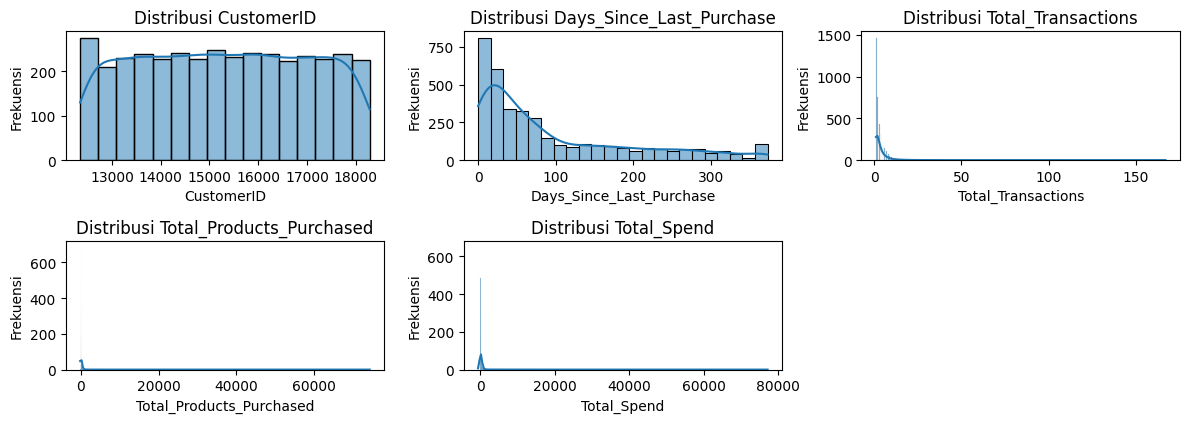

In [12]:
# Visualisasi Distribusi seluruh data numerik dengan cek skewness 
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_col):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribusi {col}'),
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Distribusi Days_Since_Last_Purchase:

- Distribusi ini menunjukkan sebagian besar pelanggan melakukan pembelian terakhir dalam waktu dekat, dengan frekuensi tertinggi pada rentang sekitar 0 hingga 50 hari. Frekuensi menurun secara signifikan seiring dengan bertambahnya hari sejak pembelian terakhir. Ini menunjukkan bahwa mayoritas pelanggan melakukan pembelian dalam waktu yang relatif dekat, tetapi ada sebagian kecil pelanggan yang jarang melakukan pembelian.

Distribusi Total_Transactions:

- Distribusi ini menunjukkan sebagian besar pelanggan hanya melakukan sedikit transaksi, dengan frekuensi yang sangat tinggi pada nilai transaksi yang rendah (sekitar 1 hingga 10 transaksi). Namun, ada beberapa outlier yang memiliki jumlah transaksi sangat tinggi, terlihat dari ekor distribusi yang panjang. Artinya, sebagian besar pelanggan bertransaksi dalam jumlah kecil, tetapi ada beberapa pelanggan yang sangat aktif.

Distribusi Total_Products_Purchased:

- Grafik ini menunjukkan bahwa mayoritas pelanggan membeli sedikit produk, tetapi terdapat beberapa outlier yang membeli produk dalam jumlah yang sangat besar. Ini terlihat dari distribusi yang sangat menumpuk di dekat nilai rendah namun memiliki ekor yang panjang. Outlier ini dapat menunjukkan pelanggan grosir atau pelanggan besar.

Distribusi Total_Spend:

- Distribusi total pengeluaran menunjukkan pola yang mirip dengan distribusi produk yang dibeli. Sebagian besar pelanggan memiliki pengeluaran yang rendah, dengan sedikit outlier yang memiliki pengeluaran sangat besar. Ini menunjukkan adanya pelanggan yang menghabiskan jumlah signifikan dibandingkan dengan mayoritas pelanggan lainnya.

Kesimpulan:
- Distribusi yang Tidak Merata: Baik jumlah transaksi, produk yang dibeli, maupun pengeluaran menunjukkan distribusi yang sangat condong ke nilai rendah, dengan sedikit outlier yang tinggi. Ini menandakan bahwa ada sejumlah kecil pelanggan yang memiliki kontribusi signifikan terhadap penjualan.
Pelanggan Baru Lebih Aktif: Banyak pelanggan yang baru melakukan pembelian terakhir dalam waktu dekat, tetapi banyak juga yang sudah lama tidak aktif.
Adanya Outlier: Data memiliki beberapa outlier yang perlu diperhatikan, terutama dalam hal jumlah transaksi, produk yang dibeli, dan total pengeluaran. Outlier ini bisa jadi merupakan pelanggan prioritas atau menunjukkan adanya kesalahan data.

In [13]:
# Check Skewness Level
data[num_col].skew()

CustomerID                   0.000792
Days_Since_Last_Purchase     1.201128
Total_Transactions          13.243242
Total_Products_Purchased    49.526776
Total_Spend                 34.841617
dtype: float64

In [14]:
# Mengkategorikan fitur skewness level
skewness = data[num_col].skew()
highly_skewed_cols = list(skewness[abs(skewness) > 1].index)
normal_skewed_cols = list(skewness[abs(skewness) <= 1].index)

highly_skewed_cols, normal_skewed_cols

(['Days_Since_Last_Purchase',
  'Total_Transactions',
  'Total_Products_Purchased',
  'Total_Spend'],
 ['CustomerID'])

In [15]:
def outlier_percentage(df, cols):
  '''
  Fungsi ini untuk melakukan pengecekan persentase outliers dari kolom numerik
  
  '''
  outlier_percentages = {}
  for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    outlier_percentages[col] = outlier_percentage
  return outlier_percentages

# Calculate and print the percentage of outliers in the specified columns
outlier_percentages_normal = outlier_percentage(data, highly_skewed_cols)
print("Outlier Percentages in Normal Skewed Columns:")
for col, percentage in outlier_percentages_normal.items():
  print(f"{col}: {percentage:.2f}%")


Outlier Percentages in Normal Skewed Columns:
Days_Since_Last_Purchase: 3.14%
Total_Transactions: 7.61%
Total_Products_Purchased: 9.29%
Total_Spend: 9.13%


In [16]:
from feature_engine.outliers import Winsorizer

windsoriser_high = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=3.0,
                          variables=highly_skewed_cols)

X = windsoriser_high.fit_transform(data)
X

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend
0,12346,325,1,380,619.63
1,12347,39,5,223,494.65
2,12348,318,2,264,92.16
3,12349,18,1,46,101.69
4,12350,310,1,37,100.00
...,...,...,...,...,...
3753,18278,73,1,16,25.20
3754,18280,277,1,14,58.50
3755,18281,180,1,1,16.95
3756,18283,3,13,115,182.76


In [17]:
# Pengecekan skewness level setelah dilakukan metode capping untuk outliers
X[num_col].skew()

CustomerID                  0.000792
Days_Since_Last_Purchase    1.201128
Total_Transactions          1.841538
Total_Products_Purchased    1.752322
Total_Spend                 1.710107
dtype: float64

## Scaling

In [18]:
X_Numcols = X[num_col]

In [19]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Numcols)

In [20]:
X_scaled = pd.DataFrame(X_scaled, columns=num_col)
X_scaled

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend
0,-1.713696,2.272080,-0.722750,2.998018,2.984232
1,-1.713115,-0.562743,0.606877,1.418505,2.210399
2,-1.712534,2.202697,-0.390343,1.830990,-0.281679
3,-1.711952,-0.770894,-0.722750,-0.362219,-0.222672
4,-1.711371,2.123401,-0.722750,-0.452764,-0.233136
...,...,...,...,...,...
3753,1.735392,-0.225736,-0.722750,-0.664036,-0.696272
3754,1.736554,1.796306,-0.722750,-0.684157,-0.490090
3755,1.737136,0.834845,-0.722750,-0.814945,-0.747353
3756,1.738299,-0.919574,3.266130,0.331962,0.279285


## PCA

In [21]:
# Chack shape
X_scaled.shape

(3758, 5)

In [22]:
pca = PCA()
pca.fit(X_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

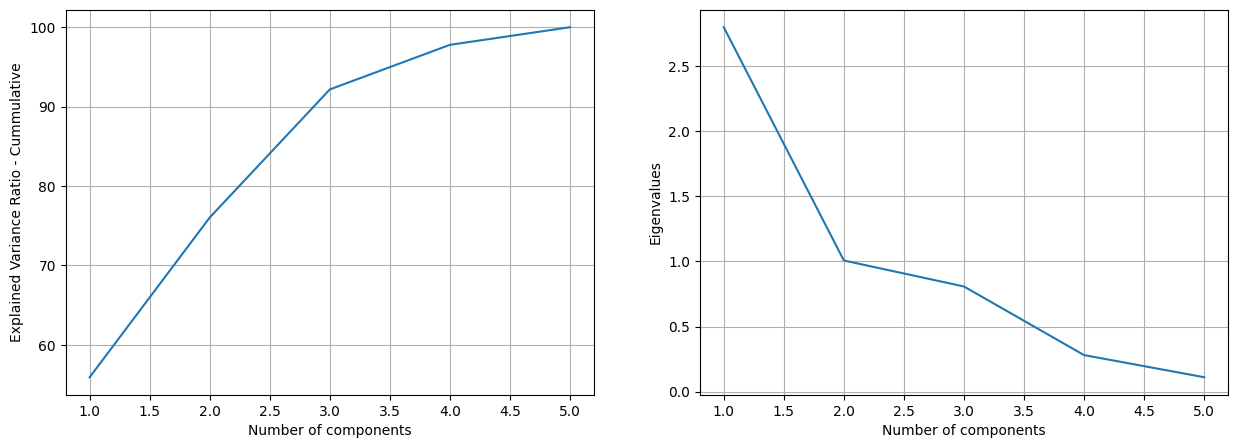

In [26]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 6), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [40]:
# Check the number of features if we want to retain 75 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.92) + 1
num_features

3

In [41]:
pca = PCA(n_components=3)
pca.fit(X_scaled)

X_scaled_pca = pca.transform(X_scaled)

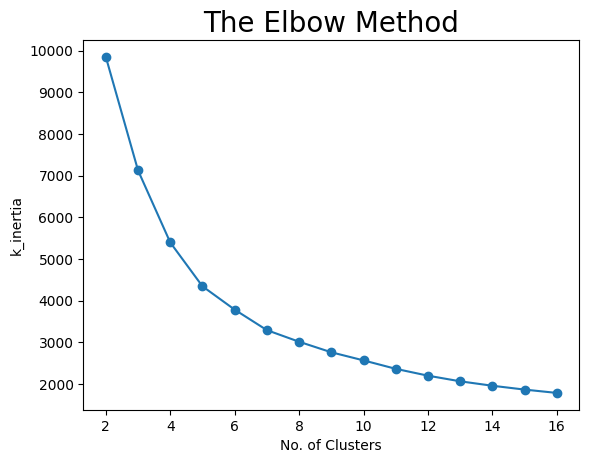

In [42]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 17):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 43)
    km.fit(X_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 17), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

In [43]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.4668047560679673
For n_clusters = 3 The average silhouette_score is : 0.35431846163432995
For n_clusters = 4 The average silhouette_score is : 0.3495019218416743
For n_clusters = 5 The average silhouette_score is : 0.34877003254981154
For n_clusters = 6 The average silhouette_score is : 0.3454318385151259


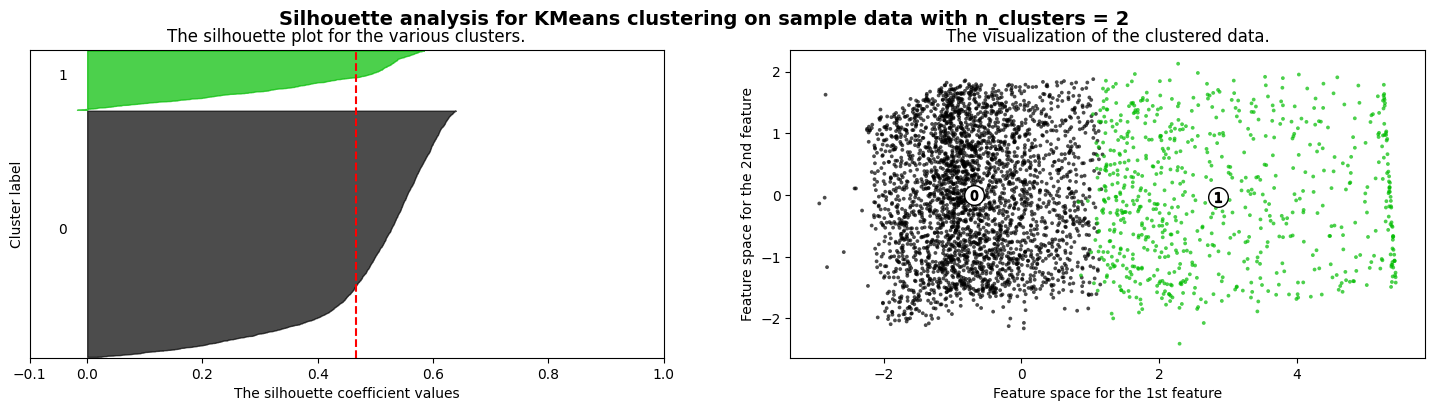

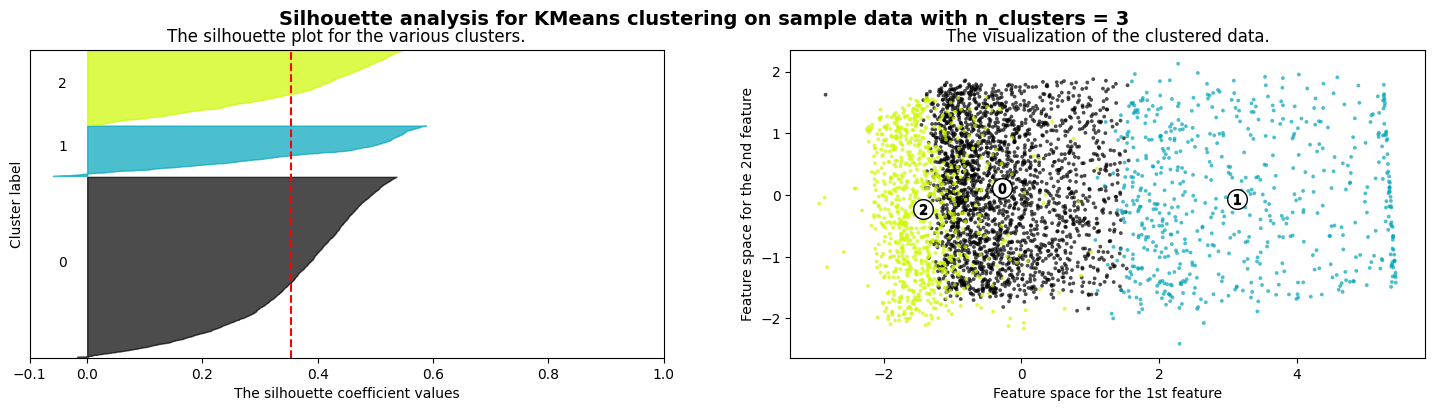

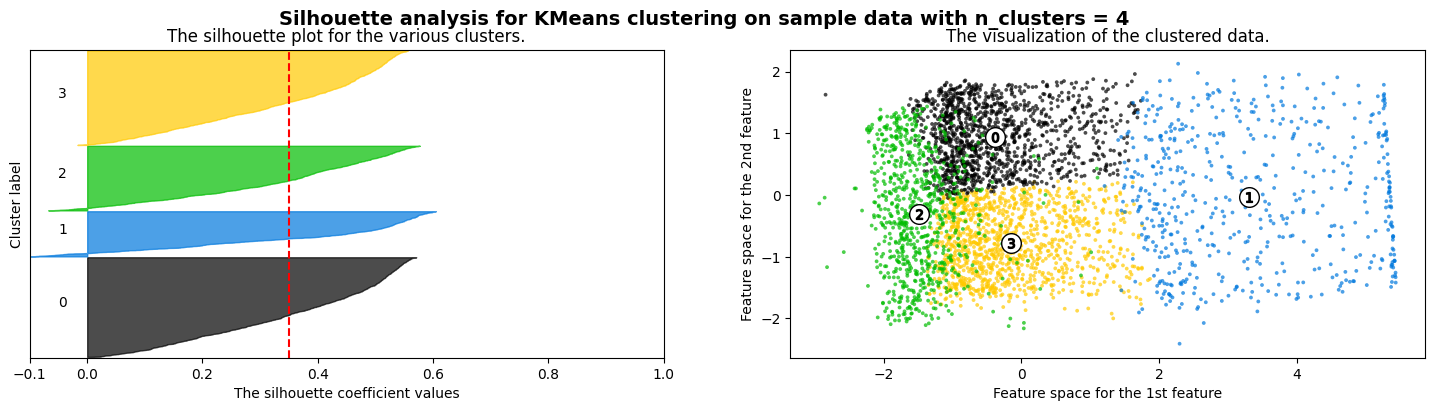

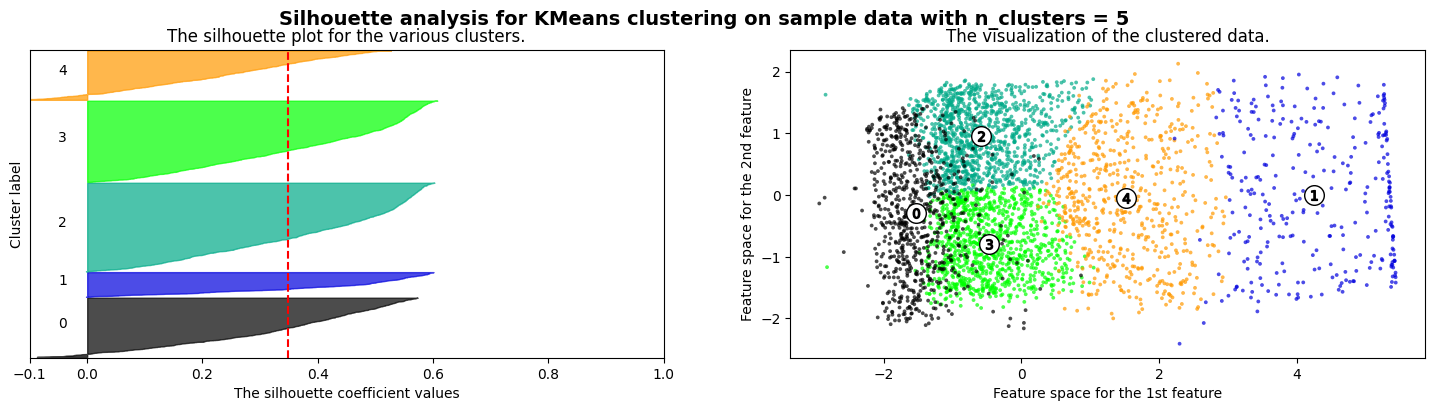

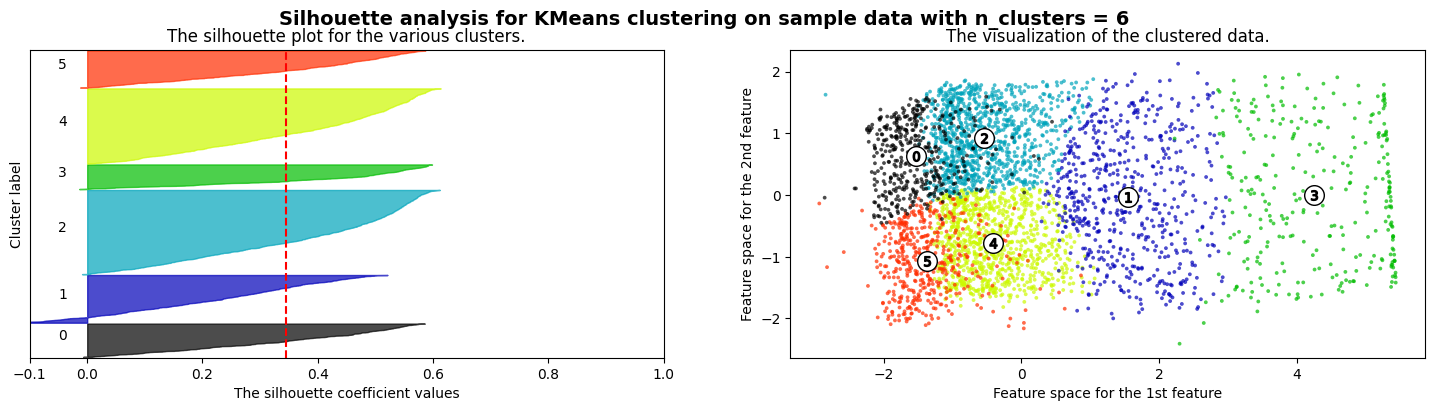

In [44]:
plot_silhouette(range(2, 7), X_scaled_pca, 3)

## Model Definition

Pakai k-Means karena cocok untuk data segmentation atau clustering.

## Model Training

In [69]:
km = KMeans(n_clusters = 3, random_state = 43)
km.fit(X_scaled_pca)

KMeans(n_clusters=3, random_state=43)

In [70]:
pred = km.predict(X_scaled_pca)
pred

array([1, 1, 0, ..., 0, 1, 2])

In [71]:
km.n_iter_

9

In [72]:
# Insert clustering result into original dataset

df_kmeans = data.copy() #ini biar nyoba2 model lain
df_kmeans['cluster'] = pred
df_kmeans

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,cluster
0,12346,325,1,74215,77183.60,1
1,12347,39,5,223,494.65,1
2,12348,318,2,264,92.16,0
3,12349,18,1,46,101.69,2
4,12350,310,1,37,100.00,0
...,...,...,...,...,...,...
3753,18278,73,1,16,25.20,2
3754,18280,277,1,14,58.50,0
3755,18281,180,1,1,16.95,0
3756,18283,3,13,115,182.76,1


<Axes: >

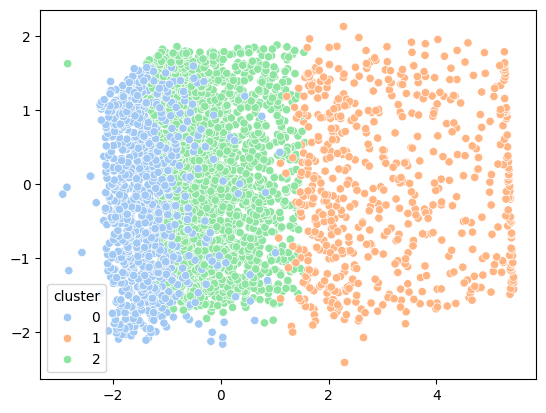

In [73]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=4)
pca_2d.fit(X_scaled)

X_scaled_pca_2d = pca_2d.fit_transform(X_scaled)

#scatter PC1 & PC2
sns.scatterplot(x=X_scaled_pca_2d[:,0], y=X_scaled_pca_2d[:,1], hue=df_kmeans['cluster'], palette='pastel')

In [74]:
df_kmeans['cluster'].value_counts()

cluster
2    2219
0     916
1     623
Name: count, dtype: int64

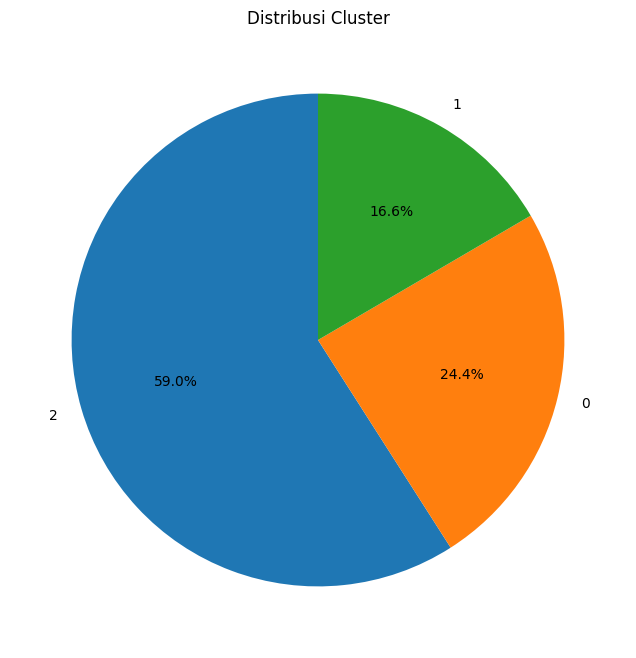

In [75]:
# Count the number of data points in each cluster
cluster_counts = df_kmeans['cluster'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Cluster')
plt.show()

Dari grafik piechart diatas bisa di konklusikan bahwa cluster 2 mendominasi didata ini dengan 59% populasi sedangkan cluster 0 di 24.4% dan cluster 1 di 16.6%.

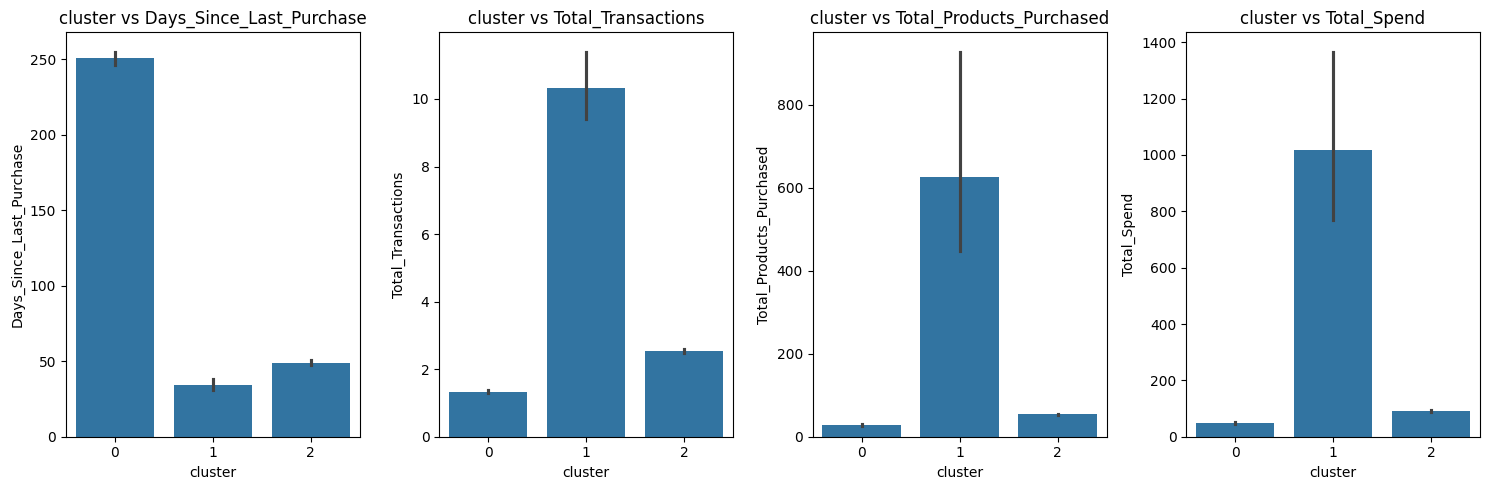

In [81]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
sns.barplot(data=df_kmeans, x='cluster', y='Days_Since_Last_Purchase', ax=axs[0]); axs[0].set_title('cluster vs Days_Since_Last_Purchase')
sns.barplot(data=df_kmeans, x='cluster', y='Total_Transactions', ax=axs[1]); axs[1].set_title('cluster vs Total_Transactions')
sns.barplot(data=df_kmeans, x='cluster', y='Total_Products_Purchased', ax=axs[2]); axs[2].set_title('cluster vs Total_Products_Purchased')
sns.barplot(data=df_kmeans, x='cluster', y='Total_Spend', ax=axs[3]); axs[3].set_title('cluster vs Total_Spend')
plt.tight_layout()

Cluster vs Days_Since_Last_Purchase:

- Kluster 0 memiliki nilai Days_Since_Last_Purchase yang sangat tinggi dibandingkan dengan kluster 1 dan 2. Ini menunjukkan bahwa kluster 0 berisi pelanggan yang sudah lama tidak melakukan pembelian.
Kluster 1 dan 2 memiliki nilai Days_Since_Last_Purchase yang relatif rendah, menunjukkan pelanggan dalam kluster ini masih cukup aktif.

Cluster vs Total_Transactions:

- Kluster 1 memiliki jumlah transaksi tertinggi, diikuti oleh kluster 2, sedangkan kluster 0 memiliki jumlah transaksi yang paling rendah. Ini menunjukkan bahwa kluster 1 terdiri dari pelanggan yang sangat aktif bertransaksi.
Kluster 0 dengan nilai Total_Transactions yang rendah konsisten dengan tingginya nilai Days_Since_Last_Purchase, menandakan pelanggan yang kurang aktif.

Cluster vs Total_Products_Purchased:

- Kluster 1 memiliki jumlah produk yang dibeli paling banyak dibandingkan dengan kluster lainnya. Ini menunjukkan bahwa kluster 1 adalah kluster dengan pelanggan yang paling aktif dan mungkin paling menguntungkan.
Kluster 0 memiliki nilai yang sangat rendah dalam hal jumlah produk yang dibeli, menunjukkan ketidakaktifan pelanggan dalam kluster ini.

Cluster vs Total_Spend:

- Kluster 1 memiliki Total_Spend tertinggi, yang konsisten dengan banyaknya jumlah transaksi dan produk yang dibeli. Pelanggan dalam kluster ini mungkin berkontribusi besar terhadap pendapatan perusahaan.
Kluster 0 memiliki pengeluaran yang paling rendah, sementara kluster 2 berada di tengah, menunjukkan pelanggan dengan aktivitas pembelian yang sedang.

Kesimpulan:
- Kluster 0 tampaknya terdiri dari pelanggan yang sudah lama tidak melakukan transaksi, dengan pengeluaran dan jumlah produk yang dibeli sangat rendah. Ini menunjukkan bahwa kluster ini berisi pelanggan yang tidak aktif atau mungkin tidak tertarik berbelanja di e-commerce.
- Kluster 1 adalah kluster paling aktif dengan jumlah transaksi, produk yang dibeli, dan pengeluaran tertinggi. Pelanggan dalam kluster ini berpotensi menjadi target utama untuk kampanye loyalitas atau penawaran eksklusif.
- Kluster 2 memiliki tingkat aktivitas yang lebih moderat dibandingkan kluster 1. Pelanggan di kluster ini mungkin memerlukan sedikit dorongan untuk lebih aktif bertransaksi.